In [61]:
import os, sys, importlib
import copy
sys.path.append('/content/drive/My Drive/Research/qutip_sim/custom_files')
sys.path.append('/content/drive/My Drive/Research/qutip_sim/site-packages')
sys.path.append('/content/drive/My Drive/Research/qutip_sim/site-packages/qutip')
from qutip import *
from analysis_tools import *
from sim_functions import *
from experiment_sim import *

import matplotlib.pyplot as plt
import numpy as np
from scipy import optimize
%load_ext autoreload 
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## VQE averaged by many points

Initial state: -i, 0, non-conditional


/usr/local/lib/python3.6/dist-packages/numpy/fft/_pocketfft.py:74: ComplexWarning: Casting complex values to real discards the imaginary part
  r = pfi.execute(a, is_real, is_forward, fct)
/content/drive/My Drive/Research/qutip_sim/custom_files/analysis_tools/operation.py:191: RuntimeWarning: divide by zero encountered in true_divide
  fit = amp*np.exp(-t/decay)*np.sin(2.*np.pi*omega*t+phi)+offset
/content/drive/My Drive/Research/qutip_sim/custom_files/analysis_tools/operation.py:191: RuntimeWarning: invalid value encountered in true_divide
  fit = amp*np.exp(-t/decay)*np.sin(2.*np.pi*omega*t+phi)+offset


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

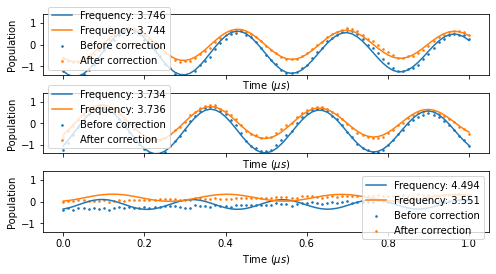

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

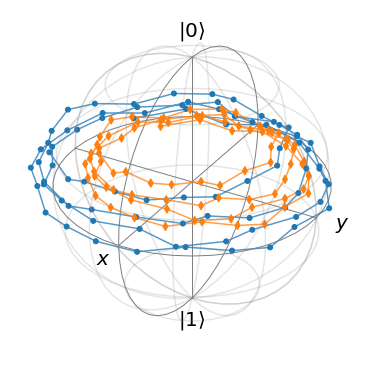

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

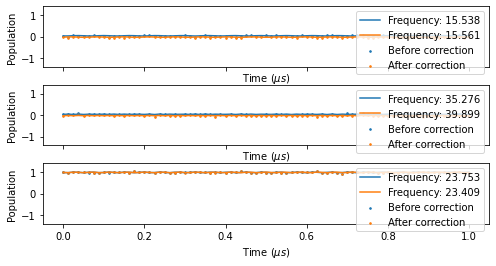

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

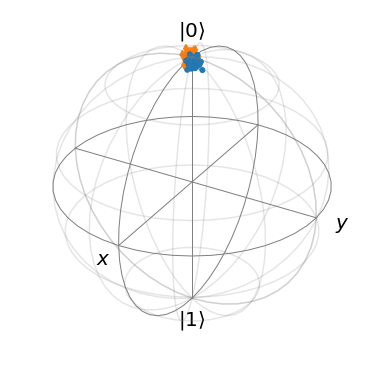

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

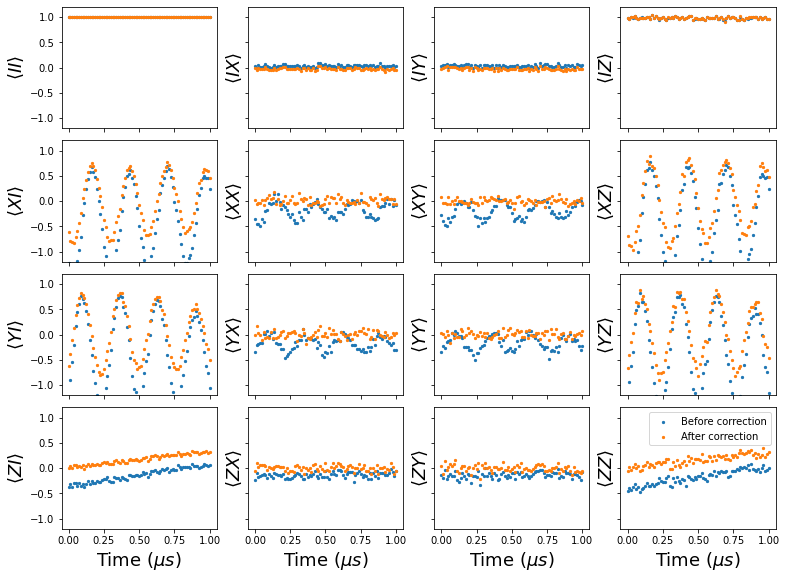

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

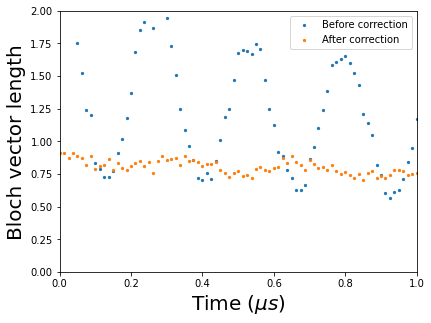

In [73]:
directory = '/content/drive/My Drive/Research/Data/Experiment/Hamiltonian_tomography/test/'
file_name = '-hamiltonian_tomography.run/'
file_list = [109, 171, 191, 253]
init_list = ['-i, 1, non-conditional', '-i, 1, conditional', '-i, 0, non-conditional', '-i, 0, conditional']
file_list = [191]# , 253]
init_list = ['-i, 0, non-conditional']# , '-i, 0, conditional']


hamiltonian_tomography_exp(directory, file_name, file_list, init_list, include_individual=True, save='Ramsey')

In [ ]:



directory = '/content/drive/My Drive/Research/Data/Experiment/VQE/test/'

vqe_exp(directory, file_name='-echo_vqe_v4.run/', file_list=[26], init_list=['test'])

FileNotFoundError: ignored

In [ ]:
def file_num(x):

  num = "{x:.0f}"
  if x < 100:
    num = "0{x:.0f}"

  return num.format(x=x)

def load_data(file_name, start, step, num):

  result_joint = []
  result_simple = []
  k = start - step
  for i in range(num):
    k += step
    result_joint.append(np.load('/content/drive/My Drive/Research/Data/Experiment/VQE/'+file_name+'/000'+file_num(k)+'-echo_vqe_v4.run/e_joint.npy'))
    try:
      result_simple.append(np.load('/content/drive/My Drive/Research/Data/Experiment/VQE/'+file_name+'/000'+file_num(k)+'-echo_vqe_v4.run/e_indiv.npy'))
    except:
      result_simple.append(np.load('/content/drive/My Drive/Research/Data/Experiment/VQE/'+file_name+'/000'+file_num(k)+'-echo_vqe_v4.run/e_simple.npy'))

  theta = np.load('/content/drive/My Drive/Research/Data/Experiment/VQE/'+file_name+'/000'+file_num(start)+'-echo_vqe_v4.run/theta.npy')

  return result_joint, result_simple, theta

In [ ]:
def full_qst(theta, result):

  s = np.shape(result)
  # result = np.reshape(result, (s[0],s[2],s[1]))

  fig, axes = plt.subplots(nrows=4, ncols=4)
  fig.set_figheight(8)
  fig.set_figwidth(20)
  label = ["II", "IX", "IY", "IZ", "XI", "XX", "XY", "XZ", "YI", "YX", "YY", "YZ", "ZI", "ZX", "ZY", "ZZ"]
  # print(s)
  for i in range(16):
    for j in range(s[2]):
      # axes.subplot(i/4, i%4)
      axes[int(i / 4), i % 4].set_title(r'$\langle{%s}\rangle$' % label[i])
      axes[int(i / 4), i % 4].scatter(theta, result[i,:,j], s=10, marker=".")
      axes[int(i / 4), i % 4].set_ylim(-1.2, 1.2)
  plt.show()

def partial_qst(theta, result):

  s = np.shape(result)
  # result = np.reshape(result, (s[0],s[2],s[1]))

  fig, axes = plt.subplots(nrows=1, ncols=5)
  fig.set_figheight(8)
  fig.set_figwidth(20)
  label = ["II", "IX", "IY", "IZ", "XI", "XX", "XY", "XZ", "YI", "YX", "YY", "YZ", "ZI", "ZX", "ZY", "ZZ"]
  # print(s)
  for i, p in enumerate([12,3,5,10,15]):
    for j in range(s[2]):
      axes[i].set_title(r'$\langle{%s}\rangle$' % label[p])
      axes[i].scatter(theta, result[p,:,j], s=10) # , marker=".")
      axes[i].set_ylim(-1.2, 1.2)
  
  plt.show()

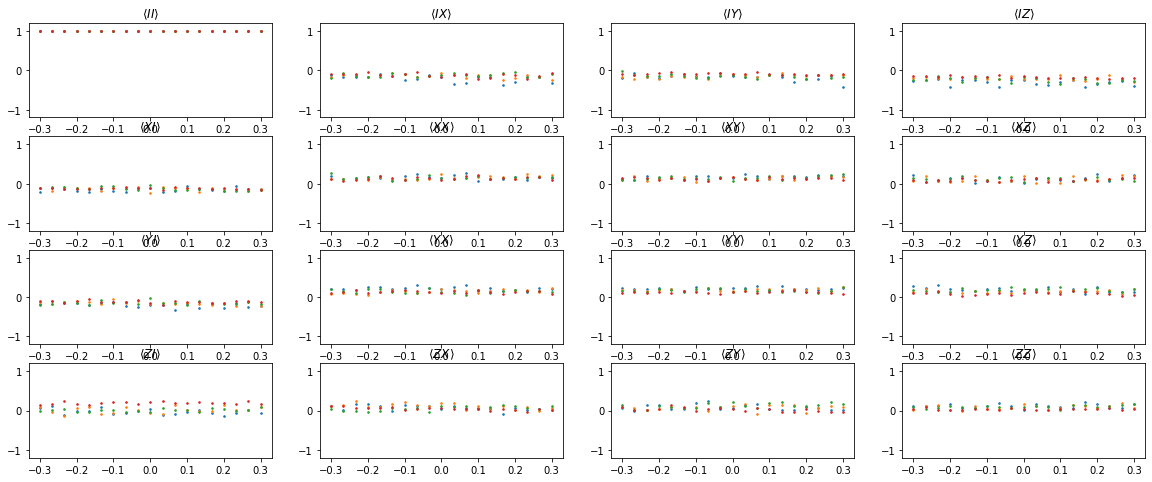

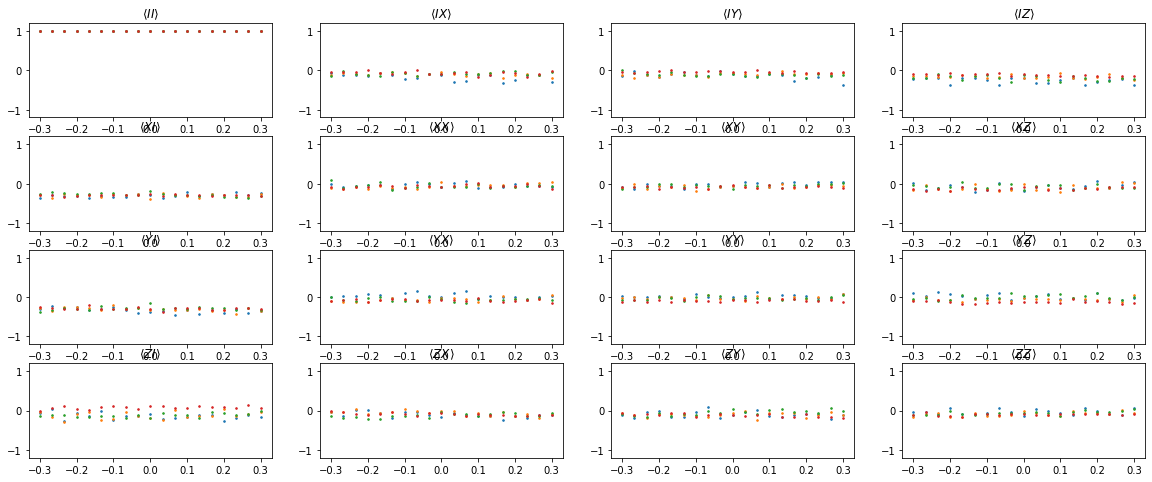

In [ ]:
result_1echo_joint, result_1echo_simple, theta_1echo = load_data('Oct_09-07.28.15', start=30, step=24, num=8)
result_ave_1echo_joint = np.average(result_1echo_joint, axis=0)
result_ave_1echo_simple = np.average(result_1echo_simple, axis=0)# for i in range(4):
#   print('Error strength %s:' % 2**i)
#   error = np.concatenate((result_ave_1echo_joint[:,:,i,None], result_ave_1echo_simple[:,:,i,None]), axis=2)
#   full_qst(theta_1echo, error)

# print('Joint readout correction')
# partial_qst(theta_1echo, result_ave_1echo_joint)
# print('Individual readout')
# partial_qst(theta_1echo, result_ave_1echo_simple)
full_qst(theta_1echo, result_ave_1echo_joint)
full_qst(theta_1echo, result_ave_1echo_simple)

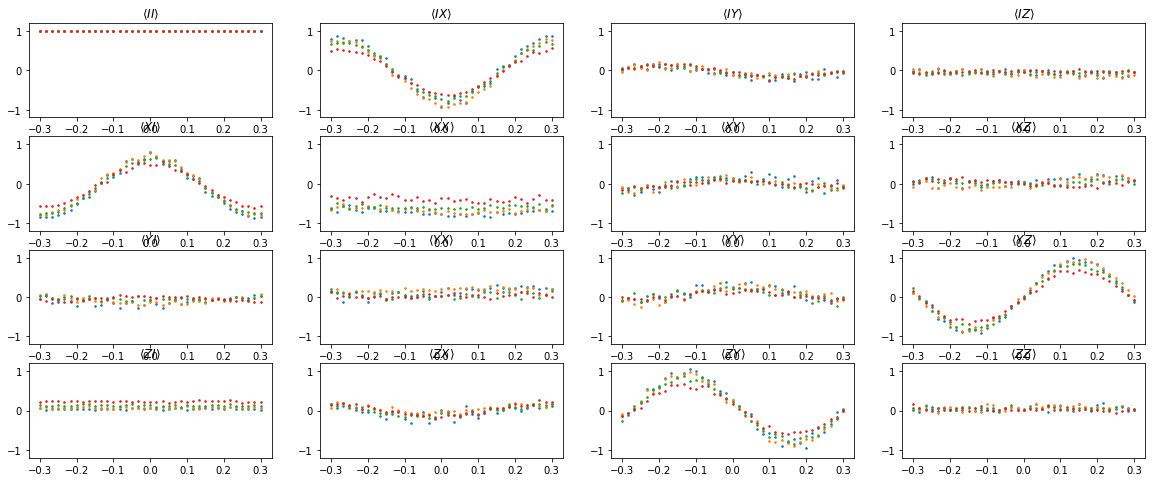

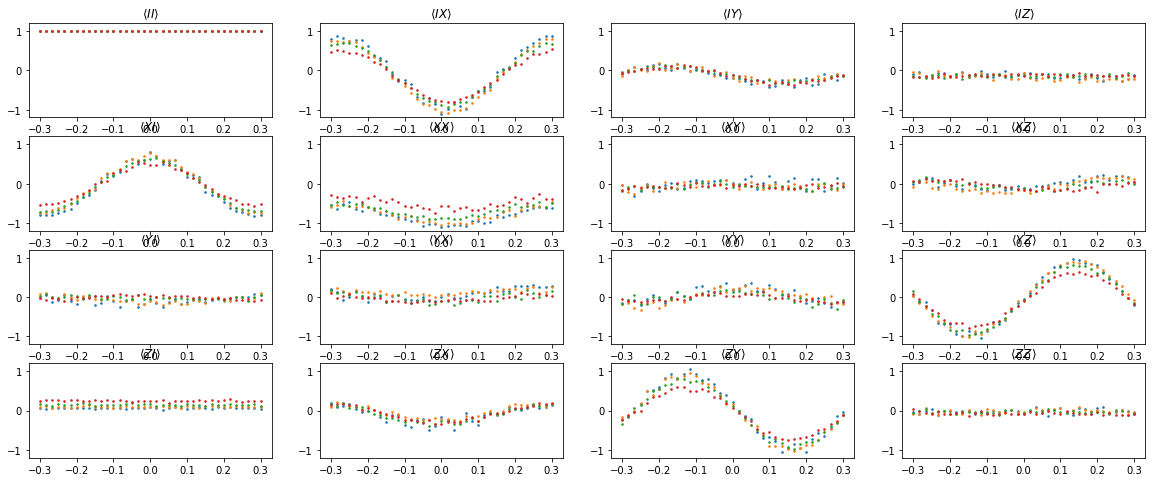

In [ ]:
result_1echo_joint, result_1echo_simple, theta_1echo = load_data('VQE_many_points_30', start=56, step=26, num=16)
result_ave_1echo_joint = np.average(result_1echo_joint, axis=0)
result_ave_1echo_simple = np.average(result_1echo_simple, axis=0)# for i in range(4):
#   print('Error strength %s:' % 2**i)
#   error = np.concatenate((result_ave_1echo_joint[:,:,i,None], result_ave_1echo_simple[:,:,i,None]), axis=2)
#   full_qst(theta_1echo, error)

# print('Joint readout correction')
# partial_qst(theta_1echo, result_ave_1echo_joint)
# print('Individual readout')
# partial_qst(theta_1echo, result_ave_1echo_simple)
full_qst(theta_1echo, result_ave_1echo_joint)
full_qst(theta_1echo, result_ave_1echo_simple)

In [ ]:
result_1echo_joint, result_1echo_simple, theta_1echo = load_data('VQE_many_points', start=65, step=27)
result_ave_1echo_joint = np.average(result_1echo_joint, axis=0)
result_ave_1echo_simple = np.average(result_1echo_simple, axis=0)

Error strength 1:


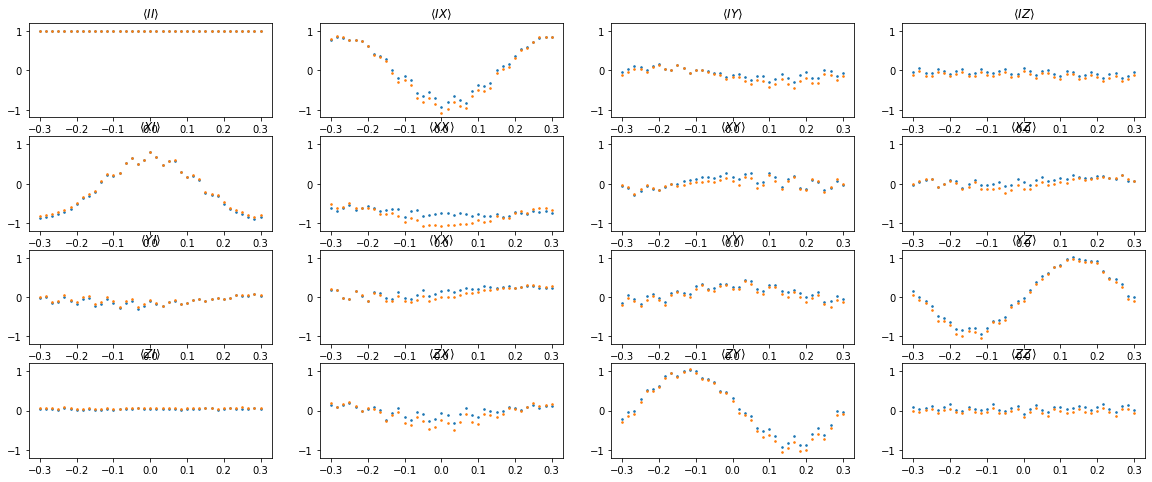

Error strength 2:


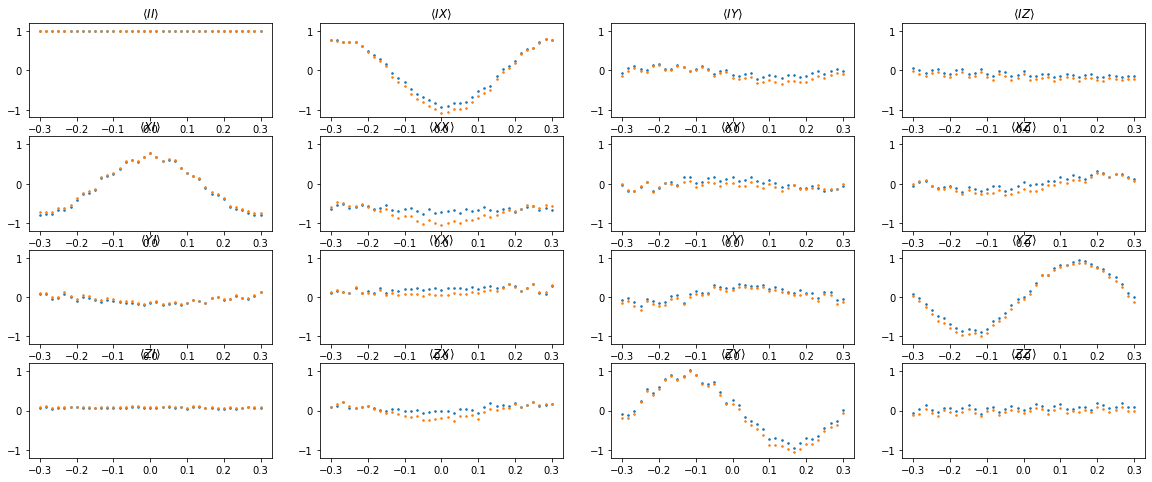

Error strength 4:


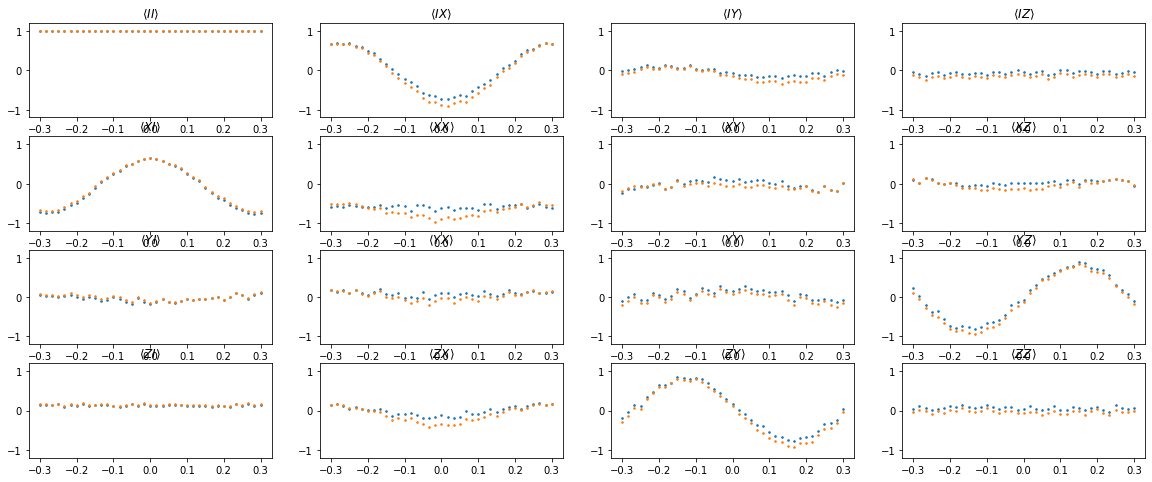

Error strength 8:


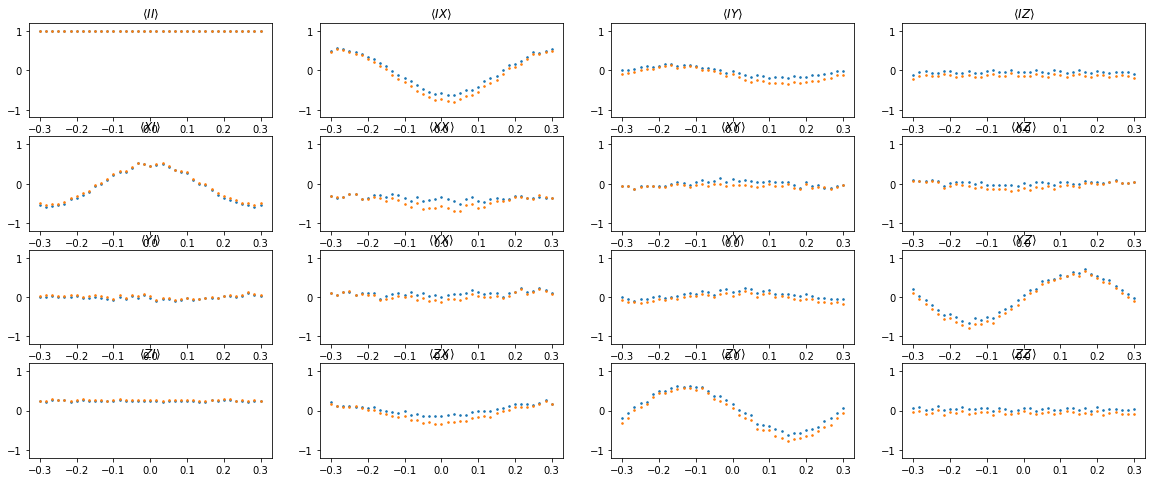

In [ ]:
for i in range(4):
  print('Error strength %s:' % 2**i)
  error = np.concatenate((result_ave_1echo_joint[:,:,i,None], result_ave_1echo_simple[:,:,i,None]), axis=2)
  full_qst(theta_1echo, error)

# print('Joint readout correction')
# partial_qst(theta_1echo, result_ave_1echo_joint)
# print('Individual readout')
# partial_qst(theta_1echo, result_ave_1echo_simple)
# full_qst(theta_1echo, result_ave_1echo_joint)
# full_qst(theta_1echo, result_ave_1echo_simple)

In [ ]:
def flip_indices(pauli):

    N = len(pauli)

    if N > 2:
        ind = []
        for i, pau in enumerate(pauli):
            if pau == 'I':
                pass
            else:
                ind.append(N-i)

        bits = [2**(i+1) for i in range(N-1)]

        bits.pop(ind[0]-2)
        bits.pop(ind[1]-2)

        sums = [0,1]
        for i in bits:
            sums = [j+k for j in sums for k in [0,i]]

        sums_11 = [2 ** (ind[1] - 1) + 2 ** (ind[0] - 1) + i for i in sums]
        sums_10 = [2 ** (ind[0] - 1) + i for i in sums]
        sums_01 = [2 ** (ind[1] - 1) + i for i in sums]
        positive = sums + sums_11
        negative = sums_10 + sums_01

    else:
        positive = [0,3]
        negative = [1,2]

    return positive, negative

###
def load_data_test(month, module, address, file_num):

    os.chdir("D:\\oqclab-0.4_logs\\" + month + "\\" + address) #28
    os.chdir('{:0=6}-{experiment}.run'.format(file_num, experiment=module))
    data = np.load('raw_data.npy')
    theta = np.load('theta.npy')
    meas_bases = np.load('meas_bases.npy')
    os.chdir('..')

    return theta, data, meas_bases

def transform_data_for_vqe(month, module, address, file_nums, average=False):

    zis = [];
    izs = [];
    xxs = [];
    yys = [];
    zzs = []
    std_1q_terms = []
    std_2q_terms = []
    for file_num in file_nums:
        time_points, data, meas_bases = load_data_test(month, module, address, file_num)

        if len(data[1][0][:])==1:
            init_flip = False
        else:
            init_flip = True

        '''
        time_points: a numpy array that contains the information for x-axis (sweep parameter)
        
        data: contains the experimental result
            data[0]: (N of qubits, 4, swp_param, trans_bases, error, meas_bases), 
                        IQ voltage of (ground state, excited state, measured z, calibrated z)
            data[1]: (N of correlations, swp_param, trans_bases, error, meas_bases), 
                        calibrated expectation value of correlated measurements
            data[2]: (N of qubits, 4, swp_param, trans_bases, error, meas_bases), 
                        standard deviation of (ground state, excited state, measured z, calibrated z)
            data[3]: (N of qubits, 1, swp_param, trans_bases, error, meas_bases), 
                        standard deviation of correlated measurements
                        
        meas_bases: a list that contains the information of measurement bases
            even index: state tomography in positive side (ex. for X basis, Y_{\pi/2})
            odd index: state tomography in negative side (ex. for X basis, Y_{-\pi/2})
        '''

        # data[0] = [z,zz, z_std or zz_std][qubit, (g,e,z or clbr), swp_param, trans_bases, error, meas_bases]
        pauli_1q_terms = []
        std_1q_term = []

        for i in range(len(data[0])):
            for j in range(len(meas_bases)):
                if len(np.shape(np.array(data[0]))) == 5:  # For vqe without error mitigation
                    #print('no')
                    pauli_1q_term = (np.mean(np.array(data[0])[i, 3, :, :, 2 * j], axis=1) -
                                     np.mean(np.array(data[0])[i, 3, :, :, 2 * j + 1], axis=1)) / 2
                    std_1q = (np.mean(np.array(data[2])[i, 3, :, :, 2 * j], axis=1) +
                                   np.mean(np.array(data[2])[i, 3, :, :, 2 * j + 1], axis=1)) / 2

                else: # For vqe with error mitigation
                    pauli_1q_term = (np.mean(np.array(data[0])[i, 3, :, :, :, 2 * j], axis=1) -
                                     np.mean(np.array(data[0])[i, 3, :, :, :, 2 * j + 1], axis=1)) / 2
                    std_1q = (np.mean(np.array(data[2])[i, 3, :, :, :, 2 * j], axis=1) +
                                   np.mean(np.array(data[2])[i, 3, :, :, :, 2 * j + 1], axis=1)) / 2
                pauli_1q_terms.append(pauli_1q_term)
                std_1q_term.append(std_1q)

        # data[1] = [edge][swp_param, trans_bases, error, meas_bases]
        pauli_2q_terms = []
        std_2q_term = []
        counter = 0
        for i, bases in enumerate(meas_bases):
            if bases.find('Z') == -1 and init_flip:
                positive, negative = flip_indices(bases)

                if len(np.shape(np.array(data[0]))) == 5: # For vqe without error mitigation
                    #print('no')
                    pauli_2q_term = (np.mean(data[1][counter][:, 0, 2 * i], axis=1)
                                   - np.mean(data[1][counter][:, 1, 2 * i], axis=1)
                                   - np.mean(data[1][counter][:, 0, 2 * i + 1], axis=1)
                                   + np.mean(data[1][counter][:, 1, 2 * i + 1], axis=1)
                                   + np.mean(data[1][counter][:, 2, 2 * i], axis=1)
                                   - np.mean(data[1][counter][:, 3, 2 * i], axis=1)
                                   - np.mean(data[1][counter][:, 2, 2 * i + 1], axis=1)
                                   + np.mean(data[1][counter][:, 3, 2 * i + 1], axis=1)) / 8.

                    std_2q = (np.mean(data[3][counter][:, :, 2 * i], axis=1) + np.mean(data[3][counter][:, :, 2 * i + 1], axis=1)) / 2.

                else: # For vqe with error mitigation
                    #pauli_2q_term = (np.mean(data[1][counter][:, positive, :, 2 * i], axis=1) - np.mean(data[1][counter][:, negative, :, 2 * i], axis=1)
                    #               - np.mean(data[1][counter][:, positive, :, 2 * i + 1], axis=1) + np.mean(data[1][counter][:, negative, :, 2 * i + 1], axis=1)) / 4.
                    pauli_2q_term = (data[1][counter][:, 0, :, 2 * i]
                                   - data[1][counter][:, 1, :, 2 * i]
                                   - data[1][counter][:, 0, :, 2 * i + 1]
                                   + data[1][counter][:, 1, :, 2 * i + 1]
                                   + data[1][counter][:, 2, :, 2 * i]
                                   - data[1][counter][:, 3, :, 2 * i]
                                   - data[1][counter][:, 2, :, 2 * i + 1]
                                   + data[1][counter][:, 3, :, 2 * i + 1])/8

                    std_2q = (np.mean(data[3][counter][:, :, :, 2 * i], axis=1) + np.mean(data[3][counter][:, :, :, 2 * i + 1], axis=1)) / 2.

            else:
                if len(np.shape(np.array(data[0]))) == 5: # For vqe without error mitigation
                    #print('no')
                    pauli_2q_term = (np.mean(data[1][counter][:, :, 2 * i], axis=1) - np.mean(data[1][counter][:, :, 2 * i + 1], axis=1)) / 2.
                    std_2q = (np.mean(data[3][counter][:, :, 2 * i], axis=1) + np.mean(data[3][counter][:, :, 2 * i + 1], axis=1)) / 2.
                else: # For vqe with error mitigation
                    pauli_2q_term = (np.mean(data[1][counter][:, :, :, 2 * i], axis=1) - np.mean(data[1][counter][:, :, :, 2 * i + 1], axis=1)) / 2.
                    std_2q = (np.mean(data[3][counter][:, :, :, 2 * i], axis=1) + np.mean(data[3][counter][:, :, :, 2 * i + 1], axis=1)) / 2.

            pauli_2q_terms.append(pauli_2q_term)
            std_2q_term.append(std_2q)

        counter += 1 # For now, I am only assuming 2 qubit system. For more qubits, the code and variable 'counter' should be more generic

        zis.append(pauli_1q_terms[0])
        izs.append(pauli_1q_terms[1])
        xxs.append(pauli_2q_terms[0])
        yys.append(pauli_2q_terms[1])
        zzs.append(pauli_2q_terms[2])
        std_1q_terms.append(std_1q_term)
        std_2q_terms.append(std_2q_term)

    paulis = np.array([zis, izs, zzs, xxs, yys])

    if len(np.shape(np.array(data[0]))) == 5:  # For vqe without error mitigation
        #print('no')
        pass
    else:  # For vqe with error mitigation
        paulis = paulis.transpose(0, 1, 3, 2) # (pauli operator, files, error mitigation, sweep parameters)

    if average:
        paulis = np.average(paulis, axis=1)

    std_1q_terms = np.array(std_1q_terms).transpose(1, 0, 3, 2)
    std_2q_terms = np.array(std_2q_terms).transpose(1, 0, 3, 2)

    zi_std = std_1q_terms[2]
    iz_std = std_1q_terms[5]
    xx_std = std_2q_terms[0]
    yy_std = std_2q_terms[1]
    zz_std = std_2q_terms[2]

    pauli_devs = np.mean(np.array([zi_std, iz_std, zz_std, xx_std, yy_std]), axis=1) / np.sqrt(len(file_nums))

    return paulis, pauli_devs, time_points

def transform_data_for_vqe_errmtgt(month, module, address, file_nums, average=False):
    '''
    time_points: a numpy array that contains the information for x-axis (sweep parameter)

    data: contains the experimental result
        data[0]: (N of qubits, 4, swp_param, trans_bases, error, meas_bases), 
                    IQ voltage of (ground state, excited state, measured z, calibrated z)
        data[1]: (N of correlations, swp_param, trans_bases, error, meas_bases), 
                    calibrated expectation value of correlated measurements
        data[2]: (N of qubits, 4, swp_param, trans_bases, error, meas_bases), 
                    standard deviation of (ground state, excited state, measured z, calibrated z)
        data[3]: (N of qubits, 1, swp_param, trans_bases, error, meas_bases), 
                    standard deviation of correlated measurements

    meas_bases: a list that contains the information of measurement bases
        even index: state tomography in positive side (ex. for X basis, Y_{\pi/2})
        odd index: state tomography in negative side (ex. for X basis, Y_{-\pi/2})
    '''

    zis = [];
    izs = [];
    xxs = [];
    yys = [];
    zzs = []
    std_1q_terms = []
    std_2q_terms = []
    for file_num in file_nums:
        time_points, data, meas_bases = load_data_test(month, module, address, file_num)

        # if  data[0].ndim == 5:
        #     data[0] = data[0][:, 3, :, :, :]
        # else:
        #     pass

        if len(data[1][0][:]) == 1:
            init_flip = False
        else:
            init_flip = True

        # data[0] = [z,zz, z_std or zz_std][qubit, (g,e,z or clbr), swp_param, trans_bases, error, meas_bases]
        pauli_1q_terms = []
        std_1q_term = []
        for i in range(len(data[0])):
            for j in range(len(meas_bases)):
                pauli_1q_term = (np.mean(np.array(data[0])[i, 3, :, :, :, 2 * j], axis=1) -
                                 np.mean(np.array(data[0])[i, 3, :, :, :, 2 * j + 1], axis=1)) / 2
                std_1q = (np.mean(np.array(data[2])[i, 3, :, :, :, 2 * j], axis=1) +
                          np.mean(np.array(data[2])[i, 3, :, :, :, 2 * j + 1], axis=1)) / 2
                #print(std_1q)
                pauli_1q_terms.append(pauli_1q_term)
                std_1q_term.append(std_1q)

        # data[1] = [edge][swp_param, trans_bases, error, meas_bases]
        pauli_2q_terms = []
        std_2q_term = []
        counter = 0
        for i, bases in enumerate(meas_bases):
            if bases.find('Z') == -1 and init_flip:
                pauli_2q_term = (data[1][counter][:, 0, :, 2 * i] #ok
                               - data[1][counter][:, 1, :, 2 * i] #ok
                               + data[1][counter][:, 0, :, 2 * i + 1] # was -
                               - data[1][counter][:, 1, :, 2 * i + 1] # was +
                               - data[1][counter][:, 2, :, 2 * i] # was +
                               + data[1][counter][:, 3, :, 2 * i] # was -
                               - data[1][counter][:, 2, :, 2 * i + 1] #ok
                               + data[1][counter][:, 3, :, 2 * i + 1]) / 8 #ok

                # pauli_2q_term = (data[1][counter][:, 0, :, 2 * i]  # ok
                #                  - data[1][counter][:, 1, :, 2 * i]  # ok
                #                  - data[1][counter][:, 2, :, 2 * i]  # was +
                #                  + data[1][counter][:, 3, :, 2 * i]) / 4  # ok
                # #
                # pauli_2q_term = (data[1][counter][:, 0, :, 2 * i + 1]  # was -
                #                  - data[1][counter][:, 1, :, 2 * i + 1]  # was +
                #                  - data[1][counter][:, 2, :, 2 * i + 1]  # ok
                #                  + data[1][counter][:, 3, :, 2 * i + 1]) / 4  # ok

                std_2q = (np.mean(data[3][counter][:, :, :, 2 * i], axis=1) + np.mean(
                    data[3][counter][:, :, :, 2 * i + 1], axis=1)) / 2.

            else:
                # For vqe with error mitigation
                pauli_2q_term = (np.mean(data[1][counter][:, :, :, 2 * i], axis=1) + np.mean(
                    data[1][counter][:, :, :, 2 * i + 1], axis=1)) / 2.   # it was subtraction instead of addition
                std_2q = (np.mean(data[3][counter][:, :, :, 2 * i], axis=1) + np.mean(
                    data[3][counter][:, :, :, 2 * i + 1], axis=1)) / 2.

            pauli_2q_terms.append(pauli_2q_term)
            std_2q_term.append(std_2q)

        counter += 1  # For now, I am only assuming 2 qubit system. For more qubits, the code and variable 'counter' should be more generic

        zis.append(pauli_1q_terms[2])
        izs.append(pauli_1q_terms[5])
        xxs.append(pauli_2q_terms[0])
        yys.append(pauli_2q_terms[1])
        zzs.append(pauli_2q_terms[2])
        std_1q_terms.append(std_1q_term)
        std_2q_terms.append(std_2q_term)

    paulis = np.array([zis, izs, zzs, xxs, yys])

    paulis = paulis.transpose(0, 1, 3, 2)  # (pauli operator, files, error mitigation, sweep parameters)

    if average:
        paulis = np.average(paulis, axis=1)

    std_1q_terms = np.array(std_1q_terms).transpose(0, 1, 3, 2)
    std_2q_terms = np.array(std_2q_terms).transpose(0, 1, 3, 2)

    zi_std = std_1q_terms[:,2]
    iz_std = std_1q_terms[:,5]
    xx_std = std_2q_terms[:,0]
    yy_std = std_2q_terms[:,1]
    zz_std = std_2q_terms[:,2]

    pauli_devs = np.mean(np.array([zi_std, iz_std, zz_std, xx_std, yy_std]), axis=1) / np.sqrt(len(file_nums))


    return paulis, pauli_devs, time_points

def load_beta_test(month, module, address, file_num):

    os.chdir("D:\\oqclab-0.4_logs\\" + month + "\\" + address) #28
    os.chdir('{:0=6}-{experiment}.run'.format(file_num, experiment=module))
    result = np.load('results.npy')
    param = np.load('parameters.npy')
    os.chdir('..')

    return result, param

### General plot
def plot_data(month,module,address,file_nums):
    files = len(file_nums)
    fig, ax = plt.subplots(nrows=4, ncols=4*files, figsize=(20,10)) # squeeze=True,

    for i in range(files):
        theta, data, meas_bases = load_data_test(month, module, address, file_nums[i])
        #print(np.shape(np.array(data[0])))
        #print(np.shape(np.array(data[1])))
        #data_z = (np.array(data[0])[:, :, :, :, [0, 2, 4]] - np.array(data[0])[:, :, :, :, [1, 3, 5]]) / 2. # take average of opposite preparation of tomography pulses
        #data_zz = (np.array(data[1])[:, :, :, [0, 2, 4]] + np.array(data[1])[:, :, :, [1, 3, 5]]) / 2. # take average of opposite preparation of tomography pulses

        #data = [data_z, data_zz]
        N_qubits = len(data[0])
        zz = np.array(data[1])
        counter = 0

        if N_qubits == 1:
            pass
        elif len(zz[counter][0,:])==1:
            init_flip = False
        else:
            init_flip = True

        for j in range(N_qubits):
            for k in range(N_qubits):
                if j == k:
                    #print(np.array(data[0])[j].shape)
                    #print(np.array(data[0][0]).shape)  # (qubit, measurement calibration, sweep parameter, initial basis, tomography)

                    for l, bases in enumerate(meas_bases):
                        col = ['r', 'g', 'b']
                        ax[j, k].plot(theta, np.mean(np.array(data[0])[j][0, :, :, 2*l], axis=1), c=col[l], marker='.', label=r'$|0\rangle$') # ground state measurement average
                        ax[j, k].plot(theta, np.mean(np.array(data[0])[j][1, :, :, 2*l], axis=1), c=col[l], marker='.', label=r'$|1\rangle$') # excited state measurement average
                        ax[j, k].plot(theta, np.mean(np.array(data[0])[j][2, :, :, 2*l], axis=1), c=col[l], marker='.', label=r'$\langle{Z_{%s}}\rangle$'%str(j+1)) # raw measurement average
                        ax[j, k].legend(loc="upper right")
                elif j < k:
                    for l, bases in enumerate(meas_bases):

                        col = ['r','g','b']
                        #ax[j, k].plot(theta, np.array(data[0])[j][3, :, :, l], c='b', marker='.',)  # calibrated measurement outcome
                        #ax[j, k].plot(theta, np.array(data[0])[k][3, :, :, l], c='r', marker='.',)  # calibrated measurement outcome
                        #ax[j, k].plot(theta, zz[counter][:, :, l]) # calibrated collerated measurement outcome
                        if l == 2:
                            ax[j, k].plot(theta, np.mean(np.array(data[0])[j][3, :, :, 2*l], axis=1), c='b', marker='.', label=r'$\langle{Z_{%s}}\rangle$'%str(j+1)) # calibrated measurement average
                            ax[j, k].plot(theta, np.mean(np.array(data[0])[k][3, :, :, 2*l], axis=1), c='r', marker='.', label=r'$\langle{Z_{%s}}\rangle$'%str(k+1)) # calibrated measurement average

                        if N_qubits == 1:
                            pass
                        elif bases.find('Z') == -1 and init_flip:
                            positive, negative = flip_indices(bases)
                            #print(positive, negative)
                            correlation = (np.mean(zz[counter][:, positive, 2*l], axis=1) - np.mean(zz[counter][:, negative, 2*l], axis=1)) / 2.
                        else:
                            correlation = np.mean(zz[counter][:, :, 2*l], axis=1)

                        ax[j, k].scatter(theta, correlation, c=col[l], marker='.', label=r'$\langle{%s}\rangle$'%(meas_bases[l])) # calibrated correlated measurement average
                        ax[j, k].legend(loc="upper right")
                    counter += 1
    plt.show()

def plot_data_in_one(month,module,address,file_nums,size):

    fig, ax = plt.subplots(nrows=size[0], ncols=size[1], figsize=(8, 4)) # squeeze=True,

    for i in range(size[0]):
        for j in range(size[1]):
            theta, data, meas_bases = load_data_test(month, module, address, file_nums[size[0]*i + j])
            N_qubits = len(data[0])
            colors=['r', 'y', 'g']
            for k in range(N_qubits):
                for l, bases in enumerate(meas_bases):
                    ax[i, j].plot(theta, np.mean(np.array(data[0])[k][0, :, :, l], axis=1), c='k', marker='.', alpha=0.3, label=r'$|0\rangle$') # ground state measurement average
                    ax[i, j].plot(theta, np.mean(np.array(data[0])[k][1, :, :, l], axis=1), c='b', marker='.', alpha=0.3, label=r'$|1\rangle$') # excited state measurement average
                    ax[i, j].scatter(theta, np.mean(np.array(data[0])[k][2, :, :, l], axis=1), c=colors[k], marker='.', label=r'$\langle{Z_{%s}}\rangle$' % str(k + 1), zorder=10)

    for i in range(size[0]):
        for j in range(size[1]):
            theta, data, meas_bases = load_data_test(month, module, address, file_nums[size[0] * i + j])
            for k in range(N_qubits):
                for l, bases in enumerate(meas_bases):
                    #ax[i, j].scatter(theta, np.mean(np.array(data[0])[k][2, :, :, l], axis=1), c='r', marker='.', label=r'$\langle{Z_{%s}}\rangle$'%str(k+1), zorder=10) # raw measurement average
                    ax[i, j].legend(loc="upper right")
    plt.show()

def plot_data_errmtgt(month,module,address,file_nums):
    files = len(file_nums)
    fig, ax = plt.subplots(nrows=2, ncols=2*files, figsize=(8, 4))
    

    for i in range(files):
        theta, data, meas_bases = load_data_test(month, module, address, file_nums[i])
        
        raw_data = np.array(data[0])
        z = np.array(data[1])
        zz = np.array(data[2])[0]
        z_std = np.array(data[3])
        zz_std = np.array(data[4])[0]
        
        print(np.shape(np.array(data)))
        print(np.shape(raw_data)) #(2, 1000, 3, 8, 4, 5, 6)
        print(np.shape(z)) #(2, 4, 8, 4, 5, 6)
        print(np.shape(zz)) #(8, 4, 5, 6)
        print(np.shape(z_std)) #(2, 4, 8, 4, 5, 6)
        print(np.shape(zz_std)) #(8, 4, 5, 6)
        
        print('wwwwwww')

        N_qubits = len(z)
        print(N_qubits) # 2 
        counter = 0
        if len(zz[counter][0])==1:
            init_flip = False
        else:
            init_flip = True

        for q_row in range(N_qubits):
            for q_col in range(N_qubits):
                if q_row == q_col:
                    #print(np.array(data[0]).shape) # (number of qubit, measurement calibration, sweep parameter, initial basis, error mitigation, tomography)
                    for l in range(len(raw_data[0, 0, 0, 0])):
                        for m, bases in enumerate(meas_bases):
                            # print(np.shape(np.mean(z[q_row, 0, :, :, l, 2*m], axis=1)))
                            ax[q_row, q_col].plot(theta, np.mean(z[q_row, 0, :, :, l, 2*m], axis=1), c='k', marker='.', label=r'$|0\rangle$') # raw measurement average
                            ax[q_row, q_col].plot(theta, np.mean(z[q_row, 1, :, :, l, 2*m], axis=1), c='b', marker='.', label=r'$|1\rangle$') # raw measurement average
                            ax[q_row, q_col].plot(theta, np.mean(z[q_row, 2, :, :, l, 2*m], axis=1), c='r', marker='.', label=r'$\langle{Z_{%s}}\rangle$'%str(q_row+1)) # raw measurement average
                            ax[q_row, q_col].legend(loc="upper right")
                elif q_row < q_col:
                    for l in range(len(np.array(data[0])[0, 0, 0, 0])):
                        for m, bases in enumerate(meas_bases):
                            print(np.shape(np.mean(np.array(data[0])[q_row, 0, :, :, l, 2*m], axis=1)))
                            col = ['r', 'g', 'b', 'y', 'o']
                            ax[q_row, q_col].plot(theta, np.mean(z[q_row, 3, :, :, l, 2*m], axis=1), 'k', marker='.', label=r'$\langle{Z_{%s}}\rangle$'%str(q_row+1)) # calibrated measurement average
                            ax[q_row, q_col].plot(theta, np.mean(z[q_col, 3, :, :, l, 2*m], axis=1), 'b', marker='.', label=r'$\langle{Z_{%s}}\rangle$'%str(q_col+1)) # calibrated measurement average
                            
                            if bases.find('Z') == -1 and init_flip:
                                positive, negative = flip_indices(bases)
                                print(positive, negative)
                                print(np.shape(zz))
                                print(np.mean(zz[:, positive, l, 2*m], axis=1))
                                correlation = (np.mean(zz[:, positive, l, 2*m], axis=1) - np.mean(zz[:, negative, l, 2*m], axis=1) + np.mean(zz[:, positive, l, 2*m+1], axis=1) - np.mean(zz[:, negative, l, 2*m+1], axis=1)) / 4.
                                #print(correlation)
                            else:
                                correlation = np.mean(zz[:, :, l, 2*m], axis=1)
                            ax[q_row, q_col].plot(theta, correlation, c=col[m], marker='.', label=r'$\langle{%s}\rangle$' % (meas_bases[m]))  # calibrated correlated measurement average
                            ax[q_row, q_col].legend(loc="upper right")
                    counter += 1
    plt.tight_layout()
    plt.show()

###
def beta(ss_voltages):
    A = np.array([[1, 1, 1, 1], [1, 1, -1, -1], [1, -1, 1, -1], [1, -1, -1, 1]])/2

    ss_voltages = np.transpose(ss_voltages, (3, 0, 1, 2))

    vol_shape = np.shape(ss_voltages)
    betas = np.empty((vol_shape[0], vol_shape[1], vol_shape[3]))
    SNRs = np.empty((vol_shape[0], vol_shape[1]))

    for i in range(len(ss_voltages)):
        #print(i)
        rot_ss_voltages = np.empty(np.shape(ss_voltages[i]), dtype=np.complex64)

        for j, ss_voltage in enumerate(ss_voltages[i]):

            ave_voltage = np.average(ss_voltage, axis=-2)
            std_voltage = np.std(ss_voltage, axis=-2)
            fit_param = np.polyfit(ave_voltage.real, ave_voltage.imag, 1)
            theta = np.arctan(fit_param[0])
            rot_ss_voltages[j] = np.exp(- 1.0j * theta) * ss_voltage
            rot_ave_voltage = np.average(rot_ss_voltages[j], axis=-2)

            rot_ave_voltage = np.abs(rot_ave_voltage - rot_ave_voltage[0])
            #print(ave_voltage)
            #print(rot_ave_voltage)
            #print(f'q{i+1}:',rot_ave_voltage[3] / rot_ave_voltage[2-i])



            betas[i,j] = np.matmul(np.linalg.inv(A), rot_ave_voltage) #np.abs(rot_ave_voltage.real))
            SNRs[i,j] = (np.abs(rot_ave_voltage[0].real - rot_ave_voltage[2-j].real)) / np.average(std_voltage)

    return betas, SNRs

def plot_beta(month,module,address,file_nums):

    ss_voltages = load_beta_test(month, module, address, file_nums[0])

    fig, axes = plt.subplots(nrows=len(file_nums)*2, ncols=len(ss_voltages), figsize=(8,4)) # squeeze=True,

    labels = ['II', 'ZI', 'IZ', 'ZZ']
    for file_num in file_nums:
        ss_voltages, param = load_beta_test(month, module, address, file_num)
        betas, SNRs = beta(ss_voltages)
        for j in range(len(betas[0])):
            for k in range(4):
                axes[0,j].plot(param[j], betas[:, j, k], label=labels[k])
            axes[1, j].plot(param[j], betas[:, j, 2 - j] / betas[:, j, 1 + j], label='ratio of IZ and ZI')
            axes[1, j].plot(param[j], betas[:, j, 3] / betas[:, j, 1 + j], label='ratio of ZZ and ZI(IZ)')

            axes2 = axes[0,j].twinx()
            axes2.plot(param[j], SNRs[:, j], color='c')
            axes2.set_ylabel('SNR', color='c')
            axes[0, j].legend(loc="upper right")
            axes[1, j].legend(loc="upper right")


    fig.tight_layout()
    plt.show()

def vqe_result(func, paulis, errors, time_points, zz_coupling, pauli_devs, experiment, gp_paulis, gp_2_mit=False, plot=False):

    theta_points = time_points * 2. * zz_coupling
    gp_theta_points = np.linspace(time_points[0], time_points[-1], len(gp_paulis[0, 0])) * 2. * zz_coupling

    # error mitigation
    mitigated_paulis = func(paulis, errors)
    mitigation_2_gp_paulis, mitigation_2_gp_sigmas = gp_regression(theta_points, mitigated_paulis, pauli_devs, plot_dev=True)

    # plot data and fit
    if plot:
        plot_pauli(theta_points, mitigated_paulis, pauli_devs, fit=[gp_theta_points, mitigation_2_gp_paulis])
        plot_results(mitigated_paulis, pauli_devs, experiment)

    # error mitigation on gaussian processed data
    if gp_2_mit:
        gp_2_mitigation_paulis = func(gp_paulis, errors)
        if plot:
            plot_pauli(gp_theta_points, gp_2_mitigation_paulis, pauli_devs)
            plot_results(gp_2_mitigation_paulis, pauli_devs, experiment)

    return #mitigated_paulis, mitigation_2_gp_paulis, gp_2_mitigation_paulis, gp_theta_points

# month = "19-Aug"
# module = "msmt_clbr"
# address = "12-02.24.06"
# module = "msmt_clbr_errmtgt"
# file_nums = [17 + 16*i for i in range(4)] # 17
#
# experiment = "vqe_h2"
# pulse = 45.
# evolution = 700.
# zz_coupling = 0.75
# errors = (np.array([1., 2.])*evolution + pulse*6) / (evolution + pulse*6)

#paulis, pauli_devs, time_points = transform_data_for_vqe_errmtgt(month, module, address, file_nums, average=True)

#gp_paulis, gp_sigmas = gp_regression(time_points * 2. * zz_coupling, paulis, pauli_devs, plot_dev=False)

#vqe_result(lin_extrapolation, paulis, errors, time_points, pauli_devs, experiment, gp_paulis, gp_2_mit=True, plot=True)
#vqe_result(exp_poly_extrapolation, paulis, errors, time_points, pauli_devs, experiment, gp_paulis, gp_2_mit=True, plot=True)


In [ ]:
result_2echo_joint, result_2echo_simple, theta_2echo = load_data('VQE_many_points', start=64, step=27)
result_ave_2echo_joint = np.average(result_2echo_joint, axis=0)
result_ave_2echo_simple = np.average(result_2echo_simple, axis=0)

In [ ]:
full_qst(theta_2echo, result_ave_2echo_joint)
full_qst(theta_2echo, result_ave_2echo_simple)